In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [6]:
df = pd.read_csv("/content/T20_2019_1백만.1.csv", encoding = "euc-kr")

In [19]:
df.tail()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
438800,2019,33379,109309221,1,12,27,20190614,3,1,E1150,I109,1,1,0.15,13230.0,2800.0,10430.0,30.0,20201222.0
438801,2019,33380,102228929,2,14,11,20190114,3,1,N008,K580,1,1,0.15,17580.0,1700.0,15880.0,1.0,20201222.0
438802,2019,33380,104835945,2,14,11,20191129,3,1,J410,J300,1,1,0.15,13040.0,1500.0,11540.0,3.0,20201222.0
438803,2019,33380,104836208,2,14,11,20191127,3,1,J410,J300,1,1,0.15,13040.0,1500.0,11540.0,3.0,20201222.0
438804,2019,33380,102518517,2,14,11,20190419,3,1,J410,J300,1,1,0.00,NaN,NaN,NaN,NaN,NaN


In [10]:
df['성별코드'].value_counts()

2    247767
1    191038
Name: 성별코드, dtype: int64

In [ ]:
'''
0~4세	01
5~9세	02
10~14세	03
15~19세	04
20~24세	05
25~29세	06
30~34세	07
35~39세	08
40~44세	09
45~49세	10
50~54세	11
55~59세	12
60~64세	13
65~69세	14
70~74세	15
75~79세	16
80~84세	17
85~89세	18
90~94세	19
95~99세	20
100세 이상	21
15세미만	22
15~64세	23
65세이상	24
85세이상	25
유아(0~7세)	26
초(8~13세)	27
중(14~16세)	28
고(17~19세)	29
10대이하	30
10대	31
20대	32
30대	33
40대	34
50대	35
60대	36
70대	37
80대	38
90대	39
70대이상	40
80대이상	41
'''

In [22]:
df['연령대코드'].value_counts()

13    42273
12    37310
14    36244
1     34128
15    33373
11    31925
16    30731
10    26874
2     23681
9     22518
8     20552
17    20209
7     16721
6     15314
3     12616
5     12300
18    11237
4     10799
Name: 연령대코드, dtype: int64

In [32]:
df_age = df['연령대코드'].apply(lambda x: (x-1)//2).value_counts().sort_index()
df_age

0    57809
1    23415
2    27614
3    37273
4    49392
5    69235
6    78517
7    64104
8    31446
Name: 연령대코드, dtype: int64

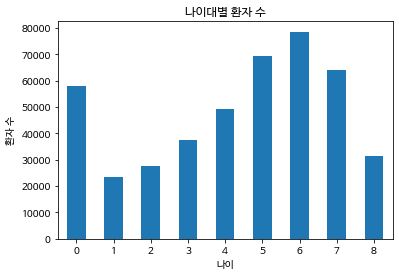

In [33]:
df_age.plot(kind='bar', rot=0)
plt.title("나이대별 환자 수")
plt.xlabel("나이")
plt.ylabel("환자 수")
plt.show()

In [18]:
df['주상병코드'].apply(lambda x: x[0]).value_counts()

J    114451
M     74777
H     36716
I     33492
K     26008
S     24673
L     22075
E     20783
N     20762
F     12941
R     10181
B      9364
G      7742
A      6754
C      5863
Z      4058
D      3636
T      2686
O       765
Q       612
P       462
U         4
Name: 주상병코드, dtype: int64

In [ ]:
'''
시도코드 | 시도명
11 | 서울시
26 | 부산시
27 | 대구시
28 | 인천시
29 | 광주시
30 | 대전시
31 | 울산시
36 | 세종시
41 | 경기도
42 | 강원도
43 | 충청북도
44 | 충청남도
45 | 전라북도
46 | 전라남도
47 | 경상북도
48 | 경상남도
49 | 제주도
'''

In [35]:
df['시도코드'].value_counts()

41    106384
11     79123
26     31081
48     28856
47     23722
28     22729
27     20840
46     19237
44     19121
45     18618
43     14989
30     12467
42     11803
29     11644
31      9675
49      6001
36      2515
Name: 시도코드, dtype: int64

In [34]:
df.groupby(df.시도코드).count()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
시도코드,,,,,,,,,,,,,,,,,,
11,79123,79123,79123,79123,79123,79123,79123,79123,79123,79123,79123,79123,79123,79122,79122,79122,79122,79122
26,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081,31081
27,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840,20840
28,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729,22729
29,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644,11644
30,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467,12467
31,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675
36,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515,2515
41,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384,106384
